In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

**2.Load data into tool**

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
ig=pd.read_csv("/content/drive/MyDrive/Mall_Customers.csv")
ig

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [6]:
ig.shape

(200, 5)

In [7]:
ig = ig.drop(columns=["CustomerID"],axis=1)
ig.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


3.Perform visualisations 
Univariate Analysis

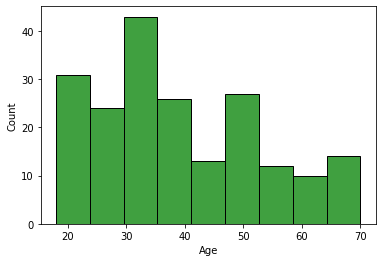

In [8]:
sns.histplot(x=ig.Age,color='Green')

Bivariate Analysis

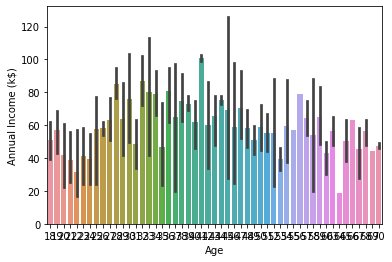

In [9]:
sns.barplot(x=ig.Age,y=ig['Annual Income (k$)'])

Multivariate Analysis

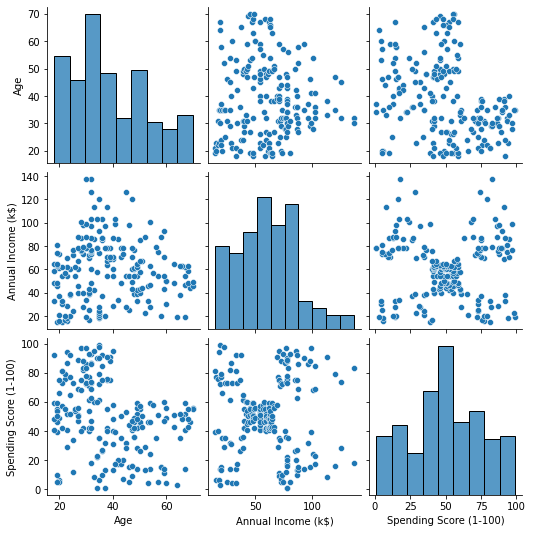

In [10]:
sns.pairplot(ig)

4. Perform descriptive statistics on the dataset.

In [18]:
ig.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,59.800000,50.200000
std,13.969007,25.110409,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.000000,50.000000
75%,49.000000,77.250000,73.000000
max,70.000000,126.000000,99.000000


5.Check for missing values and deal with them

In [11]:
ig.isnull().any()

Gender                    False
Age                       False
Annual Income (k$)        False
Spending Score (1-100)    False
dtype: bool

In [12]:
ig.isnull().sum()

Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

6. Find the outliers and replace them outliers

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


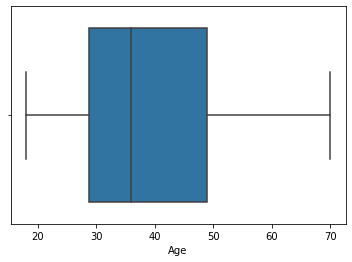

In [13]:
sns.boxplot(ig.Age)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


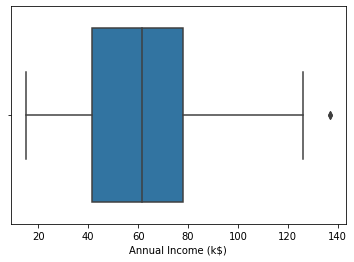

In [14]:
sns.boxplot(ig['Annual Income (k$)'])

In [15]:
ig['Annual Income (k$)'].median()   

61.5

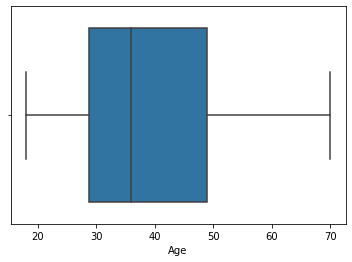

In [16]:
q1=ig['Annual Income (k$)'].quantile(0.25)
q3=ig['Annual Income (k$)'].quantile(0.75)

IQR=q3-q1

upper_limit= q3 + 1.5*IQR
lower_limit= q1 - 1.5*IQR

ig['Annual Income (k$)']= np.where(ig['Annual Income (k$)']>upper_limit,61,ig['Annual Income (k$)'])
sns.boxplot(x=ig.Age,showfliers=False)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


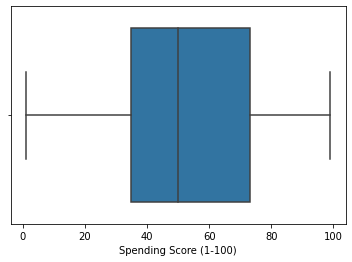

In [17]:
sns.boxplot(ig['Spending Score (1-100)'])

7. Check for Categorical columns and perform encoding
• Label encoding

In [19]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

ig.Gender=le.fit_transform(ig.Gender)

ig.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


8. Scaling the data

In [20]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(ig)
data_scaled[0:5]

array([[1.        , 0.01923077, 0.        , 0.3877551 ],
       [1.        , 0.05769231, 0.        , 0.81632653],
       [0.        , 0.03846154, 0.00900901, 0.05102041],
       [0.        , 0.09615385, 0.00900901, 0.7755102 ],
       [0.        , 0.25      , 0.01801802, 0.39795918]])

9. Perform any of the clustering algorithms

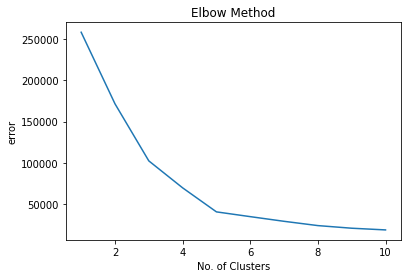

In [21]:
target = ig[['Annual Income (k$)' , 'Spending Score (1-100)']].iloc[: , :].values
from sklearn.cluster import KMeans

error = []
for i in range(1, 11):
    km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    km.fit(target)
    error.append(km.inertia_)

plt.plot(range(1, 11), error)
plt.title('Elbow Method')
plt.xlabel('No. of Clusters')
plt.ylabel('error')
plt.show()


In [22]:
k_means = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_means = k_means.fit_predict(target)

In [23]:
k_means

KMeans(n_clusters=5, random_state=0)

In [24]:
y_means

array([3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 1,
       3, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int32)

10. Add the cluster data with the primary dataset

In [25]:
ig['Outcome'] = pd.Series(y_means)
ig.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Outcome
0,1,19,15,39,3
1,1,21,15,81,4
2,0,20,16,6,3
3,0,23,16,77,4
4,0,31,17,40,3


11. Split the data into dependent and independent variables.
( i ) Independent variable

In [26]:
x=ig.drop(columns=['Outcome'],axis = 1)
x.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


( ii ) Dependent variable

In [27]:
y = ig.Outcome
y.head()

0    3
1    4
2    3
3    4
4    3
Name: Outcome, dtype: int32

12. Split the data into training and testing

In [28]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [29]:
x_train.shape

(160, 4)

In [30]:
x_test.shape

(40, 4)

In [31]:
y_train.shape

(160,)

In [32]:
y_test.shape

(40,)

13. Build the Model

In [33]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=10,criterion='entropy')
model.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10)

In [34]:
y_predict = model.predict(x_test)
y_predict_train = model.predict(x_train)

14.Train The Model

In [35]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print('Training accuracy: ',accuracy_score(y_train,y_predict_train))

Training accuracy:  1.0


15.Test the model

In [36]:
print('Testing accuracy: ',accuracy_score(y_test,y_predict))

Testing accuracy:  0.975


16. Measure the performance using Metrics

In [37]:
pd.crosstab(y_test,y_predict)

col_0,0,1,2,3,4
Outcome,,,,,
0,11,1,0,0,0
1,0,17,0,0,0
2,0,0,5,0,0
3,0,0,0,3,0
4,0,0,0,0,3


In [38]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       1.00      0.92      0.96        12
           1       0.94      1.00      0.97        17
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00         3
           4       1.00      1.00      1.00         3

    accuracy                           0.97        40
   macro avg       0.99      0.98      0.99        40
weighted avg       0.98      0.97      0.97        40

